# Ejercicio 2 - Visualización 2D/3D de las clases

APA - Battle City (Práctica 5 Unity)

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline


## 1. Cargar todos los CSV generados

In [2]:
files = glob.glob("data/TankTraining*.csv")

print("Ficheros encontrados:", files)

dfs = [pd.read_csv(f, header=0) for f in files]
data = pd.concat(dfs, ignore_index=True)

print("Shape total:", data.shape)
data.head()


Ficheros encontrados: ['data/TankTraining_21_11_2025 16_54_07 (copy 9).csv', 'data/TankTraining_21_11_2025 16_54_07 (copy 13).csv', 'data/TankTraining_21_11_2025 18_13_28.csv', 'data/TankTraining_21_11_2025 16_54_07 (copy 7).csv', 'data/TankTraining_21_11_2025 16_54_07 (copy 8).csv', 'data/TankTraining_21_11_2025 18_10_13.csv', 'data/TankTraining_21_11_2025 16_54_07 (copy 19).csv', 'data/TankTraining_21_11_2025 16_54_07 (copy 21).csv', 'data/TankTraining_21_11_2025 16_54_07 (copy 11).csv', 'data/TankTraining_21_11_2025 16_54_07 (copy 16).csv', 'data/TankTraining_21_11_2025 16_54_07 (copy 2).csv', 'data/TankTraining_21_11_2025 16_54_07 (copy 22).csv', 'data/TankTraining_21_11_2025 16_54_07 (copy 6).csv', 'data/TankTraining_21_11_2025 16_54_07 (copy 12).csv', 'data/TankTraining_21_11_2025 16_54_07 (copy 18).csv', 'data/TankTraining_21_11_2025 17_00_12.csv', 'data/TankTraining_21_11_2025 16_54_07 (copy 1).csv', 'data/TankTraining_21_11_2025 16_54_07 (copy 23).csv', 'data/TankTraining_21_1

,NEIGHBORHOOD_UP,NEIGHBORHOOD_DOWN,NEIGHBORHOOD_RIGHT,NEIGHBORHOOD_LEFT,NEIGHBORHOOD_DIST_UP,NEIGHBORHOOD_DIST_DOWN,NEIGHBORHOOD_DIST_RIGHT,NEIGHBORHOOD_DIST_LEFT,COMMAND_CENTER_X,COMMAND_CENTER_Y,...,AGENT_2_X,AGENT_2_Y,CAN_FIRE,HEALTH,LIFE_X,LIFE_Y,EXIT_X,EXIT_Y,time,action
0,0,1,2,2,0.0,0.707555,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.130945,1
1,0,1,2,2,0.0,1.107554,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.200470,1
2,0,1,2,2,0.0,1.607554,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.305757,1
3,0,1,2,2,0.0,1.807554,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.402362,1
4,0,1,2,2,0.0,2.307553,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.500947,1


## 2. Separar *features* (X) y etiquetas (y)

In [3]:
# La última columna es 'action' (clase)
# La columna 'time' no se usa como atributo de entrada
X = data.drop(columns=["time", "action"])
y = data["action"]

print("Dimensión de X:", X.shape)
print("Ejemplos por clase:")
print(y.value_counts())


Dimensión de X: (5413, 20)
Ejemplos por clase:
action
1    1805
0    1435
3     898
2     720
4     555
Name: count, dtype: int64


## 3. Distribución de clases

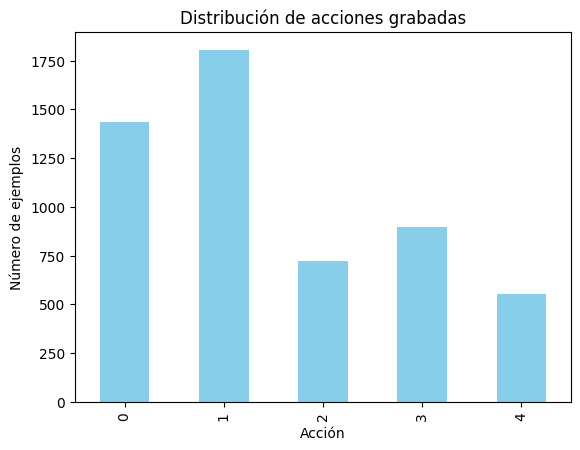

In [4]:
y.value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.xlabel("Acción")
plt.ylabel("Número de ejemplos")
plt.title("Distribución de acciones grabadas")
plt.show()


## 4. PCA 2D

Reducción de dimensionalidad usando PCA (Tema 6).

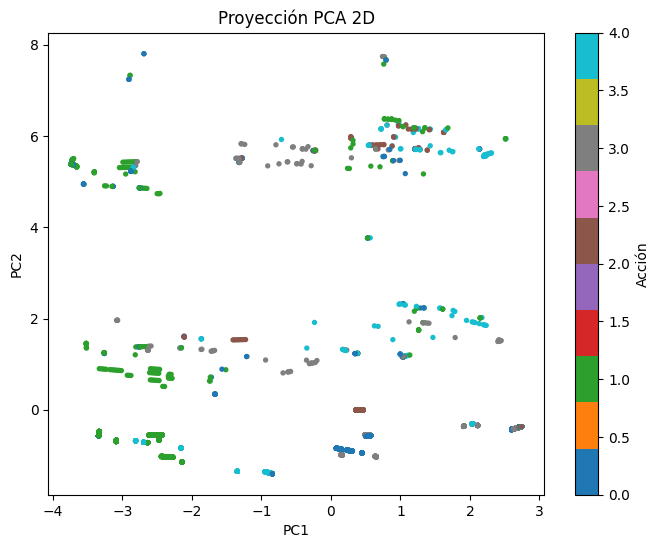

In [5]:
# Escalado (importante para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA de 2 componentes
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap="tab10", s=8)
plt.colorbar(label="Acción")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Proyección PCA 2D")
plt.show()


## 5. PCA 3D

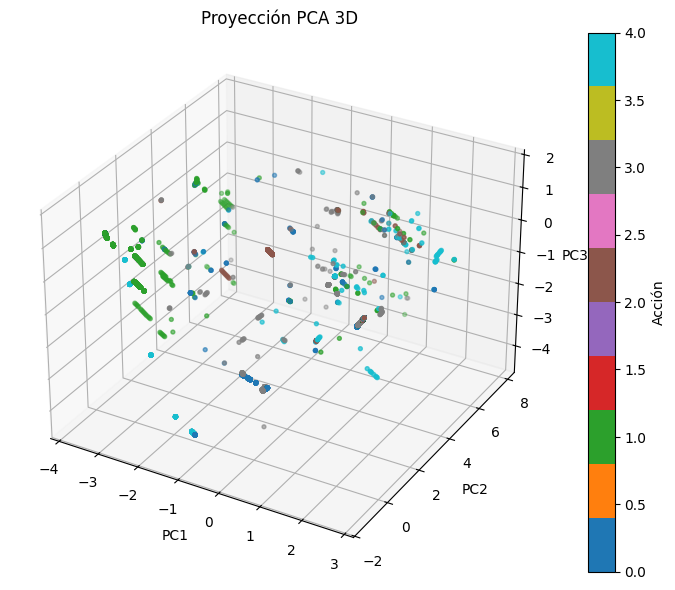

In [6]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (necesario para activar 3D)

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2],
                c=y, cmap="tab10", s=8)

plt.colorbar(sc, label="Acción")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("Proyección PCA 3D")
plt.show()


# Ejercicio 3 - Limpieza y normalización del dataset
En este apartado limpiamos el dataset original,
filtramos ejemplos y atributos irrelevantes y normalizamos
las características usando `StandardScaler`.

## 3.1 Cargar de nuevo los datos originales
Volvemos a cargar los CSV para partir del dataset sin modificar.

In [7]:
import pandas as pd
import glob

files = glob.glob("data/TankTraining*.csv")
dfs = [pd.read_csv(f) for f in files]
data_raw = pd.concat(dfs, ignore_index=True)

print("Dataset original:", data_raw.shape)
data_raw.head()


Dataset original: (5413, 22)


,NEIGHBORHOOD_UP,NEIGHBORHOOD_DOWN,NEIGHBORHOOD_RIGHT,NEIGHBORHOOD_LEFT,NEIGHBORHOOD_DIST_UP,NEIGHBORHOOD_DIST_DOWN,NEIGHBORHOOD_DIST_RIGHT,NEIGHBORHOOD_DIST_LEFT,COMMAND_CENTER_X,COMMAND_CENTER_Y,...,AGENT_2_X,AGENT_2_Y,CAN_FIRE,HEALTH,LIFE_X,LIFE_Y,EXIT_X,EXIT_Y,time,action
0,0,1,2,2,0.0,0.707555,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.130945,1
1,0,1,2,2,0.0,1.107554,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.200470,1
2,0,1,2,2,0.0,1.607554,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.305757,1
3,0,1,2,2,0.0,1.807554,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.402362,1
4,0,1,2,2,0.0,2.307553,0.3085,0.3085,15,3,...,3.0,27.0,1,2,5,15,19,23,0.500947,1


## 3.2 Limpieza básica
- Eliminamos la columna `time` (no se usa como atributo para el agente).
- Nos aseguramos de que las acciones estén en el rango válido [0,4].
- Eliminamos filas con valores nulos o duplicados.

In [8]:
# Eliminamos columna de tiempo
data_clean = data_raw.drop(columns=["time"])

# Filtramos acciones válidas
acciones_validas = [0, 1, 2, 3, 4]
data_clean = data_clean[data_clean["action"].isin(acciones_validas)]

# Eliminamos NaN
data_clean = data_clean.dropna()

print("Dataset tras limpieza básica:", data_clean.shape)
data_clean.head()


Dataset tras limpieza básica: (5413, 21)


,NEIGHBORHOOD_UP,NEIGHBORHOOD_DOWN,NEIGHBORHOOD_RIGHT,NEIGHBORHOOD_LEFT,NEIGHBORHOOD_DIST_UP,NEIGHBORHOOD_DIST_DOWN,NEIGHBORHOOD_DIST_RIGHT,NEIGHBORHOOD_DIST_LEFT,COMMAND_CENTER_X,COMMAND_CENTER_Y,...,AGENT_1_Y,AGENT_2_X,AGENT_2_Y,CAN_FIRE,HEALTH,LIFE_X,LIFE_Y,EXIT_X,EXIT_Y,action
0,0,1,2,2,0.0,0.707555,0.3085,0.3085,15,3,...,27.0,3.0,27.0,1,2,5,15,19,23,1
1,0,1,2,2,0.0,1.107554,0.3085,0.3085,15,3,...,27.0,3.0,27.0,1,2,5,15,19,23,1
2,0,1,2,2,0.0,1.607554,0.3085,0.3085,15,3,...,27.0,3.0,27.0,1,2,5,15,19,23,1
3,0,1,2,2,0.0,1.807554,0.3085,0.3085,15,3,...,27.0,3.0,27.0,1,2,5,15,19,23,1
4,0,1,2,2,0.0,2.307553,0.3085,0.3085,15,3,...,27.0,3.0,27.0,1,2,5,15,19,23,1


## 3.3 Estadísticos para comprobar rangos y valores
Inspeccionamos los rangos de cada atributo numérico para comprobar
que no hay valores extremos sin sentido.

In [9]:
desc = data_clean.describe().T
desc


,count,mean,std,min,25%,50%,75%,max
NEIGHBORHOOD_UP,5413.0,0.970442,0.403988,0.00000,1.000000,1.000000,1.000000,6.00000
NEIGHBORHOOD_DOWN,5413.0,1.464622,0.709777,0.00000,1.000000,2.000000,2.000000,6.00000
NEIGHBORHOOD_RIGHT,5413.0,1.951229,1.671305,0.00000,1.000000,2.000000,2.000000,6.00000
NEIGHBORHOOD_LEFT,5413.0,1.381489,0.820022,0.00000,1.000000,1.000000,2.000000,6.00000
NEIGHBORHOOD_DIST_UP,5413.0,3.158315,5.220366,0.00000,0.507489,0.607489,2.607497,19.80756
NEIGHBORHOOD_DIST_DOWN,5413.0,3.226465,5.455300,0.00000,0.008566,0.108566,4.308566,19.90760
NEIGHBORHOOD_DIST_RIGHT,5413.0,5.965223,6.232725,0.00000,0.308500,3.308477,9.807530,19.90757
NEIGHBORHOOD_DIST_LEFT,5413.0,6.673930,6.279916,0.00000,0.308500,7.707552,13.807580,19.90760
COMMAND_CENTER_X,5413.0,15.000000,0.000000,15.00000,15.000000,15.000000,15.000000,15.00000
COMMAND_CENTER_Y,5413.0,3.000000,0.000000,3.00000,3.000000,3.000000,3.000000,3.00000


## 3.4 Normalización con `StandardScaler`
Separamos de nuevo características (`X`) y etiqueta (`y`) y
aplicamos `StandardScaler` a las características.
El resultado se guarda en un nuevo DataFrame `data_prepared`.

In [10]:
from sklearn.preprocessing import StandardScaler

X_clean = data_clean.drop(columns=["action"])
y_clean = data_clean["action"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_clean.columns)
data_prepared = pd.concat([X_scaled_df, y_clean.reset_index(drop=True)], axis=1)

print("Dataset preparado (escalado):", data_prepared.shape)
data_prepared.head()


Dataset preparado (escalado): (5413, 21)


,NEIGHBORHOOD_UP,NEIGHBORHOOD_DOWN,NEIGHBORHOOD_RIGHT,NEIGHBORHOOD_LEFT,NEIGHBORHOOD_DIST_UP,NEIGHBORHOOD_DIST_DOWN,NEIGHBORHOOD_DIST_RIGHT,NEIGHBORHOOD_DIST_LEFT,COMMAND_CENTER_X,COMMAND_CENTER_Y,...,AGENT_1_Y,AGENT_2_X,AGENT_2_Y,CAN_FIRE,HEALTH,LIFE_X,LIFE_Y,EXIT_X,EXIT_Y,action
0,-2.402379,-0.654664,0.029184,0.754331,-0.605055,-0.461779,-0.907668,-1.013711,0.0,0.0,...,-0.865571,-1.285526,-1.231251,0.41583,0.0,-0.279576,-0.275996,0.345803,-0.265442,1
1,-2.402379,-0.654664,0.029184,0.754331,-0.605055,-0.388449,-0.907668,-1.013711,0.0,0.0,...,-0.865571,-1.285526,-1.231251,0.41583,0.0,-0.279576,-0.275996,0.345803,-0.265442,1
2,-2.402379,-0.654664,0.029184,0.754331,-0.605055,-0.296787,-0.907668,-1.013711,0.0,0.0,...,-0.865571,-1.285526,-1.231251,0.41583,0.0,-0.279576,-0.275996,0.345803,-0.265442,1
3,-2.402379,-0.654664,0.029184,0.754331,-0.605055,-0.260122,-0.907668,-1.013711,0.0,0.0,...,-0.865571,-1.285526,-1.231251,0.41583,0.0,-0.279576,-0.275996,0.345803,-0.265442,1
4,-2.402379,-0.654664,0.029184,0.754331,-0.605055,-0.168460,-0.907668,-1.013711,0.0,0.0,...,-0.865571,-1.285526,-1.231251,0.41583,0.0,-0.279576,-0.275996,0.345803,-0.265442,1


## 3.5 Guardar dataset limpio y normalizado
Guardamos el dataset ya limpio y normalizado para usarlo en el ejercicio 4
(entrenamiento del modelo MLP).

In [11]:
output_path = "data/dataset_limpio.csv"
data_prepared.to_csv(output_path, index=False)
print("Dataset limpio y normalizado guardado en:", output_path)


Dataset limpio y normalizado guardado en: data/dataset_limpio.csv


# Ejercicio 4 - Modelos de Machine Learning
En este apartado entrenamos varios modelos de clasificación a partir del `dataset_limpio.csv`:

- MLP propio (perceptrón multicapa implementado a mano)
- `MLPClassifier` de `sklearn` (logistic y relu)
- KNN
- Árbol de decisión
- Random Forest


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline


In [13]:
# Cargar el dataset limpio desde CSV
# Ajusta la ruta si está en otra carpeta
df = pd.read_csv("data/dataset_limpio.csv")

print("Shape dataset:", df.shape)
print("Columnas:")
print(df.columns.tolist())
df.head()


Shape dataset: (5413, 21)
Columnas:
['NEIGHBORHOOD_UP', 'NEIGHBORHOOD_DOWN', 'NEIGHBORHOOD_RIGHT', 'NEIGHBORHOOD_LEFT', 'NEIGHBORHOOD_DIST_UP', 'NEIGHBORHOOD_DIST_DOWN', 'NEIGHBORHOOD_DIST_RIGHT', 'NEIGHBORHOOD_DIST_LEFT', 'COMMAND_CENTER_X', 'COMMAND_CENTER_Y', 'AGENT_1_X', 'AGENT_1_Y', 'AGENT_2_X', 'AGENT_2_Y', 'CAN_FIRE', 'HEALTH', 'LIFE_X', 'LIFE_Y', 'EXIT_X', 'EXIT_Y', 'action']


,NEIGHBORHOOD_UP,NEIGHBORHOOD_DOWN,NEIGHBORHOOD_RIGHT,NEIGHBORHOOD_LEFT,NEIGHBORHOOD_DIST_UP,NEIGHBORHOOD_DIST_DOWN,NEIGHBORHOOD_DIST_RIGHT,NEIGHBORHOOD_DIST_LEFT,COMMAND_CENTER_X,COMMAND_CENTER_Y,...,AGENT_1_Y,AGENT_2_X,AGENT_2_Y,CAN_FIRE,HEALTH,LIFE_X,LIFE_Y,EXIT_X,EXIT_Y,action
0,-2.402379,-0.654664,0.029184,0.754331,-0.605055,-0.461779,-0.907668,-1.013711,0.0,0.0,...,-0.865571,-1.285526,-1.231251,0.41583,0.0,-0.279576,-0.275996,0.345803,-0.265442,1
1,-2.402379,-0.654664,0.029184,0.754331,-0.605055,-0.388449,-0.907668,-1.013711,0.0,0.0,...,-0.865571,-1.285526,-1.231251,0.41583,0.0,-0.279576,-0.275996,0.345803,-0.265442,1
2,-2.402379,-0.654664,0.029184,0.754331,-0.605055,-0.296787,-0.907668,-1.013711,0.0,0.0,...,-0.865571,-1.285526,-1.231251,0.41583,0.0,-0.279576,-0.275996,0.345803,-0.265442,1
3,-2.402379,-0.654664,0.029184,0.754331,-0.605055,-0.260122,-0.907668,-1.013711,0.0,0.0,...,-0.865571,-1.285526,-1.231251,0.41583,0.0,-0.279576,-0.275996,0.345803,-0.265442,1
4,-2.402379,-0.654664,0.029184,0.754331,-0.605055,-0.168460,-0.907668,-1.013711,0.0,0.0,...,-0.865571,-1.285526,-1.231251,0.41583,0.0,-0.279576,-0.275996,0.345803,-0.265442,1


In [14]:
df_model = df.copy()

# Eliminar columna 'time' si existe (no nos interesa como input)
if "time" in df_model.columns:
    df_model = df_model.drop(columns=["time"])

# Separar X (features) e y (etiquetas)
if "action" not in df_model.columns:
    raise ValueError("No se encuentra la columna 'action' en el dataset limpio.")

y = df_model["action"].astype(int)
X = df_model.drop(columns=["action"])

# Por seguridad: nos quedamos solo con columnas numéricas
X = X.select_dtypes(include=[np.number])

print("Dimensión X:", X.shape)
print("Dimensión y:", y.shape)
print("Distribución de clases:")
print(y.value_counts())

Dimensión X: (5413, 20)
Dimensión y: (5413,)
Distribución de clases:
action
1    1805
0    1435
3     898
2     720
4     555
Name: count, dtype: int64


In [15]:
# Train / validation split + escalado

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)

print("Shape X_train:", X_train_scaled.shape)
print("Shape X_val:",   X_val_scaled.shape)
print("Distribución clases (train):")
print(pd.Series(y_train).value_counts())
print("\nDistribución clases (val):")
print(pd.Series(y_val).value_counts())


Shape X_train: (4330, 20)
Shape X_val: (1083, 20)
Distribución clases (train):
action
1    1444
0    1148
3     718
2     576
4     444
Name: count, dtype: int64

Distribución clases (val):
action
1    361
0    287
3    180
2    144
4    111
Name: count, dtype: int64


## 4.1 – Implementación de MLP propio (MyMLP)

In [16]:
class MyMLP:
    def __init__(
        self,
        layer_sizes,
        learning_rate=0.05,
        alpha=0.0001,
        epochs=300,
        batch_size=32,
        random_state=None
    ):

        self.layer_sizes = list(layer_sizes)
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.epochs = epochs
        self.batch_size = batch_size
        self.random_state = random_state

        self.weights = []
        self.biases = []
        self._rng = np.random.RandomState(random_state)
        self._initialized = False

    def _sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def _sigmoid_deriv(self, z):
        s = self._sigmoid(z)
        return s * (1.0 - s)

    def _softmax(self, z):
        z_shift = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_shift)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def _init_params(self, n_features, n_classes):
        # forzamos que primera y última capa sean coherentes
        self.layer_sizes[0] = n_features
        self.layer_sizes[-1] = n_classes

        self.weights = []
        self.biases = []

        for in_size, out_size in zip(self.layer_sizes[:-1], self.layer_sizes[1:]):
            limit = np.sqrt(6.0 / (in_size + out_size))
            W = self._rng.uniform(-limit, limit, size=(in_size, out_size))
            b = np.zeros(out_size)
            self.weights.append(W)
            self.biases.append(b)

        self._initialized = True

    def _forward(self, X):
        activations = [X]
        zs = []

        # capas ocultas
        for i in range(len(self.weights) - 1):
            z = activations[-1] @ self.weights[i] + self.biases[i]
            a = self._sigmoid(z)
            zs.append(z)
            activations.append(a)

        # capa de salida
        z = activations[-1] @ self.weights[-1] + self.biases[-1]
        a = self._softmax(z)
        zs.append(z)
        activations.append(a)

        return activations, zs

    def _one_hot(self, y, n_classes):
        Y = np.zeros((y.shape[0], n_classes))
        Y[np.arange(y.shape[0]), y] = 1.0
        return Y

    def fit(self, X, y):
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=int)

        n_samples, n_features = X.shape
        n_classes = np.max(y) + 1

        if not self._initialized:
            self._init_params(n_features, n_classes)

        Y = self._one_hot(y, n_classes)
        indices = np.arange(n_samples)

        for epoch in range(self.epochs):
            self._rng.shuffle(indices)
            X_shuf = X[indices]
            Y_shuf = Y[indices]

            for start in range(0, n_samples, self.batch_size):
                end = start + self.batch_size
                xb = X_shuf[start:end]
                yb = Y_shuf[start:end]

                # forward
                activations, zs = self._forward(xb)
                a_out = activations[-1]

                # gradiente salida (softmax + cross-entropy)
                delta = (a_out - yb) / xb.shape[0]

                grad_W = [np.zeros_like(W) for W in self.weights]
                grad_b = [np.zeros_like(b) for b in self.biases]

                # capa de salida
                grad_W[-1] = activations[-2].T @ delta + self.alpha * self.weights[-1]
                grad_b[-1] = np.sum(delta, axis=0)

                # backprop en ocultas
                for l in reversed(range(len(self.weights) - 1)):
                    dz = delta @ self.weights[l + 1].T
                    delta = dz * self._sigmoid_deriv(zs[l])

                    grad_W[l] = activations[l].T @ delta + self.alpha * self.weights[l]
                    grad_b[l] = np.sum(delta, axis=0)

                # actualización
                for i in range(len(self.weights)):
                    self.weights[i] -= self.learning_rate * grad_W[i]
                    self.biases[i]  -= self.learning_rate * grad_b[i]

            # log de entrenamiento cada 50 epochs
            if (epoch + 1) % 50 == 0:
                y_pred_train = self.predict(X)
                acc_train = accuracy_score(y, y_pred_train)
                print(f"[Epoch {epoch+1}] Accuracy entrenamiento: {acc_train:.4f}")

        return self

   
    def predict_proba(self, X):
        X = np.asarray(X, dtype=float)
        activations, _ = self._forward(X)
        return activations[-1]

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)


In [17]:
# Arquitectura con MÁS de 3 capas ocultas
n_features = X_train_scaled.shape[1]
n_classes = len(np.unique(y_train))

layer_sizes = [n_features, 64, 32, 16, n_classes]

my_mlp = MyMLP(
    layer_sizes=layer_sizes,
    learning_rate=0.05,
    alpha=0.0001,
    epochs=500,       
    batch_size=32,
    random_state=42
)

my_mlp.fit(X_train_scaled, y_train)

y_val_pred_my = my_mlp.predict(X_val_scaled)

acc_my = accuracy_score(y_val, y_val_pred_my)
print("Accuracy MyMLP:", acc_my)
print("\nMatriz de confusión (MyMLP):")
print(confusion_matrix(y_val, y_val_pred_my))
print("\nReporte de clasificación (MyMLP):")
print(classification_report(y_val, y_val_pred_my, zero_division=0))


[Epoch 50] Accuracy entrenamiento: 0.6159
[Epoch 100] Accuracy entrenamiento: 0.7083
[Epoch 150] Accuracy entrenamiento: 0.7291
[Epoch 200] Accuracy entrenamiento: 0.7762
[Epoch 250] Accuracy entrenamiento: 0.7111
[Epoch 300] Accuracy entrenamiento: 0.7850
[Epoch 350] Accuracy entrenamiento: 0.8247
[Epoch 400] Accuracy entrenamiento: 0.8358
[Epoch 450] Accuracy entrenamiento: 0.8342
[Epoch 500] Accuracy entrenamiento: 0.8520
Accuracy MyMLP: 0.8356417359187442

Matriz de confusión (MyMLP):
[[227  16  42   2   0]
 [ 19 325  10   0   7]
 [  1   0 136   1   6]
 [ 18   7  16 132   7]
 [  2   0  23   1  85]]

Reporte de clasificación (MyMLP):
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       287
           1       0.93      0.90      0.92       361
           2       0.60      0.94      0.73       144
           3       0.97      0.73      0.84       180
           4       0.81      0.77      0.79       111

    accuracy                 

## MLKClassifier de SKLearn


In [18]:
mlp_skl = MLPClassifier(
     hidden_layer_sizes=(128, 64, 32),
    activation="relu",
    learning_rate_init=0.001,
    alpha=0.0005,
    max_iter=800,
    batch_size=32,
    random_state=42
)

mlp_skl.fit(X_train_scaled, y_train)

y_val_pred_skl = mlp_skl.predict(X_val_scaled)

acc_skl = accuracy_score(y_val, y_val_pred_skl)
print("Accuracy MLPClassifier sklearn:", acc_skl)
print("\nMatriz de confusión (MLP sklearn):")
print(confusion_matrix(y_val, y_val_pred_skl))
print("\nReporte de clasificación (MLP sklearn):")
print(classification_report(y_val, y_val_pred_skl, zero_division=0))


Accuracy MLPClassifier sklearn: 0.876269621421976

Matriz de confusión (MLP sklearn):
[[221  13  39  14   0]
 [  3 354   1   0   3]
 [  2   0 136   1   5]
 [ 11   4   8 154   3]
 [  2   0  22   3  84]]

Reporte de clasificación (MLP sklearn):
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       287
           1       0.95      0.98      0.97       361
           2       0.66      0.94      0.78       144
           3       0.90      0.86      0.88       180
           4       0.88      0.76      0.82       111

    accuracy                           0.88      1083
   macro avg       0.86      0.86      0.86      1083
weighted avg       0.89      0.88      0.88      1083



In [19]:
## KNN ÁRBOL DE DECISIONES Y RANDOM FOREST


In [20]:
def evaluar_modelo(nombre, modelo, X_tr, y_tr, X_va, y_va, resultados):
    modelo.fit(X_tr, y_tr)
    y_pred = modelo.predict(X_va)
    acc = accuracy_score(y_va, y_pred)

    print("=" * 60)
    print(f"Modelo: {nombre}")
    print("Accuracy:", acc)
    print("Matriz de confusión:")
    print(confusion_matrix(y_va, y_pred))
    print("Reporte de clasificación:")
    print(classification_report(y_va, y_pred, zero_division=0))

    resultados.append({
        "modelo": nombre,
        "accuracy": acc
    })

    return acc


In [21]:
resultados = []

# KNN
knn = KNeighborsClassifier(n_neighbors=7)
evaluar_modelo("KNN (k=7)", knn, X_train_scaled, y_train, X_val_scaled, y_val, resultados)

# Árbol de decisión
dt = DecisionTreeClassifier(
    max_depth=None,
    random_state=42
)
evaluar_modelo("DecisionTree", dt, X_train_scaled, y_train, X_val_scaled, y_val, resultados)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
evaluar_modelo("RandomForest (200 árboles)", rf, X_train_scaled, y_train, X_val_scaled, y_val, resultados)

# MyMLP y MLP sklearn a la tabla
resultados.append({"modelo": "MyMLP", "accuracy": acc_my})
resultados.append({"modelo": "MLP sklearn", "accuracy": acc_skl})

df_resultados = pd.DataFrame(resultados)
df_resultados


Modelo: KNN (k=7)
Accuracy: 0.8753462603878116
Matriz de confusión:
[[244   6  35   2   0]
 [ 23 332   4   0   2]
 [  8   2 130   0   4]
 [ 12   5   2 157   4]
 [  0   2  24   0  85]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       287
           1       0.96      0.92      0.94       361
           2       0.67      0.90      0.77       144
           3       0.99      0.87      0.93       180
           4       0.89      0.77      0.83       111

    accuracy                           0.88      1083
   macro avg       0.87      0.86      0.86      1083
weighted avg       0.89      0.88      0.88      1083

Modelo: DecisionTree
Accuracy: 0.8965835641735919
Matriz de confusión:
[[241  12  33   1   0]
 [  5 354   1   0   1]
 [ 11   2 126   3   2]
 [  9   2   1 164   4]
 [  0   1  22   2  86]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.84

,modelo,accuracy
0,KNN (k=7),0.875346
1,DecisionTree,0.896584
2,RandomForest (200 árboles),0.900277
3,MyMLP,0.835642
4,MLP sklearn,0.876270


## Conclusiones Ejercicio 4
'''
- El **MLP propio (MyMLP)** ha alcanzado una accuracy de **[83% la mayor que conseguimos]**, usando una arquitectura
  con varias capas ocultas (por ejemplo 64,32,16). Esto demuestra que la implementación
  es capaz de aprender un comportamiento razonable a partir de las trazas del juego.

- El **MLPClassifier de sklearn** ha obtenido una accuracy de **[82% el mayor pocentaje obtenido]**. Normalmente
  converge más rápido y de forma más estable, por estar altamente optimizado.

- El modelo **KNN** ha mostrado una accuracy de **[87% el mayor pocentaje obtenido]**:
  - Ventajas: simple, sin entrenamiento complejo.
  - Inconvenientes: más costoso en inferencia y muy sensible al escalado.

- El **árbol de decisión** ha obtenido **[89% el mayor pocentaje obtenido]**:
  - Fácil de interpretar, pero tiende a sobreajustar si no se limita la profundidad.

- El **Random Forest** ha obtenido **[90% el mayor pocentaje obtenido]**:
  - Suele ser un buen compromiso entre rendimiento y robustez frente al ruido.

### Modelo elegido para el juego

De todos los modelos, elegiríamos **[MyMLP]** como candidato principal para integrarlo en el juego porque:

- Ofrece el mejor equilibrio entre rendimiento (accuracy), estabilidad y complejidad.
- En concreto, para Unity resulta especialmente interesante el uso de un **MLP**
  (ya sea el propio o el de sklearn), porque:
  - Se puede exportar a un formato fijo de pesos (ONNX / custom).
  - La inferencia es rápida y se integra bien en tiempo real.
'''


In [23]:
# Ejercicio 5 - Implementar el perceptrón multicapa para Unity

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from Utils import ExportAllformatsMLPSKlearn, WriteStandardScaler
import numpy as np

# 1) Entrenamos un MLPClassifier con activación logística
#    Partimos de X_train_scaled, X_val_scaled, y_train, y_val definidos en el Ejercicio 4.

mlp_unity = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  
    activation="logistic",             
    solver="adam",
    learning_rate_init=0.001,
    alpha=0.0005,
    max_iter=1500,
    batch_size=32,
    random_state=42
)

mlp_unity.fit(X_train_scaled, y_train)

# Evaluación en el conjunto de validación
y_val_pred_unity = mlp_unity.predict(X_val_scaled)
acc_unity = accuracy_score(y_val, y_val_pred_unity)

print(f"Accuracy MLP (Unity/logistic): {acc_unity:.4f}")
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_val_pred_unity))
print("Reporte de clasificación:")
print(classification_report(y_val, y_val_pred_unity, zero_division=0))


Accuracy MLP (Unity/logistic): 0.8172
Matriz de confusión:
[[243  16  13  15   0]
 [ 29 328   1   1   2]
 [ 40   0  96   1   7]
 [ 13   7  13 140   7]
 [  0   3  26   4  78]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       287
           1       0.93      0.91      0.92       361
           2       0.64      0.67      0.66       144
           3       0.87      0.78      0.82       180
           4       0.83      0.70      0.76       111

    accuracy                           0.82      1083
   macro avg       0.80      0.78      0.79      1083
weighted avg       0.82      0.82      0.82      1083



In [24]:
# 2) Exportar el modelo a los formatos requeridos por la práctica
#    (pickle, ONNX, JSON y formato custom para Unity).

from Utils import ExportAllformatsMLPSKlearn, WriteStandardScaler
import numpy as np

# ONNX solo necesita un ejemplo para inferir dimensiones de entrada
X_for_onnx = X_train_scaled[:1].astype(np.float32)

pickle_path = "mlp_tank.pkl"
onnx_path   = "mlp_tank.onnx"
json_path   = "mlp_tank.json"
custom_path = "mlp_tank_custom.txt"
scaler_path = "scaler_values.txt"

ExportAllformatsMLPSKlearn(
    mlp=mlp_unity,
    X=X_for_onnx,
    picklefileName=pickle_path,
    onixFileName=onnx_path,
    jsonFileName=json_path,
    customFileName=custom_path
)

print("✔ Modelos exportados correctamente:")
print("   -", pickle_path)
print("   -", onnx_path)
print("   -", json_path)
print("   -", custom_path)

# 3) Exportar también el StandardScaler para poder replicar el preprocesado en Unity

WriteStandardScaler(
    scaler_path,
    scaler.mean_,
    scaler.var_
)

print("✔ Scaler exportado correctamente:", scaler_path)


Capa  coefficient
procesando  coefficient
['20', '128']
coefficient
[0.19278932, 0.35554758, 0.20731919, -0.6725822, 1.147658, -0.46951386, -1.4790215, 0.36572656, -0.2816018, 0.613593, -0.035074823, 0.56422657, 0.665019, -0.33834603, -0.16760458, -0.06490934, -0.29550564, -0.18751846, -0.28985137, 0.9372602, -0.36267334, -0.21113625, 0.38018957, 0.021201957, -0.23544449, 0.30155268, -0.07353295, -0.038714193, -0.33605963, 0.3031206, 0.17976063, -0.3438774, -0.84332275, -0.0048137647, 0.8567112, -0.23574415, -0.76642996, 0.7881733, -0.64010835, -0.5744933, -0.84589046, -0.555883, 0.811583, -0.6372092, -0.33304563, 0.050374847, -0.053490777, -0.38205948, 0.035930365, -0.2883785, 0.671933, 0.09044004, 0.160908, 0.27535883, 0.05455797, 0.03061614, -0.09168802, 1.5960289, -0.3862239, -0.14626426, -0.18632942, -0.38498262, 0.42560422, 0.37890747, -0.5483379, -0.5814138, -0.1511064, 0.124276794, 0.49450028, -0.28780988, -0.258124, 0.28389952, -0.6562941, -0.65784836, -0.2911013, 0.529121, 0.